# Day 36 – Descriptive Statistics 


In this notebook, I explored **Descriptive Statistics**, which is the branch of statistics used to **summarize and describe** data.  

It helps us understand the main characteristics of a dataset through **measures of central tendency, shape of distribution, measures of variability, and data visualization.**

---
## 1. Introduction

Descriptive statistics is the process of summarizing and describing the main features of a dataset.
It provides a quick snapshot of:
- The center of the data (average, middle, most frequent value).
- The spread of the data (how much it varies).
- The shape of the data distribution (symmetry, skewness, peakness).
- The relationships between variables.

In machine learning, descriptive statistics is a necessary first step before modeling. It helps answer:
- What is the average value?
- How spread out is the data?
- Are there any outliers?
- Are variables related to each other?

Without descriptive statistics, it’s difficult to know whether the dataset is **clean, balanced, or biased**.

Example: Instead of looking at marks of 1,000 students, we can summarize with average marks, highest, lowest, and spread.

---

## 2. Types of Data
Before applying descriptive statistics, you must identify **what type of data you’re working with**.

| **Type**         | **Sub-Type**        | **Description** | **Examples** |
|------------------|---------------------|-----------------|--------------|
| **Categorical**  | Nominal | Labels without order | Car brand: Audi, BMW, Honda |
|                  | Ordinal | Ordered categories | Customer satisfaction: Poor < Average < Excellent |
| **Numerical**    | Discrete | Countable numbers | Number of children, Exam scores |
|                  | Continuous | Measurable values | Height, Weight, Temperature |

**Why it matters?** Because the type of data decides which **statistical methods** can be applied. 
For example:
- Mean/median make sense for numerical data, but not for nominal categories.
- Mode is useful for categorical variables.

---

## 3. Population vs Sample
In statistics, we differentiate between **population** (the entire dataset) and **sample** (a subset of the population).

| **Aspect** | **Population** | **Sample** |
|------------|----------------|-------------|
| **Definition** | The entire group of interest | A small portion taken from the population |
| **Size** | Usually very large | Smaller & manageable |
| **Notation** | Parameters (μ, σ², p) | Statistics (x̄, s², p̂) |
| **Example** | Marks of all students in India | Marks of 100 students from one school |

In ML, we almost always work with **samples**, because analyzing the entire population is not feasible.

---

## 4. Central Tendency
Central tendency refers to the **measure of the "center"** of the data distribution.

### 4.1 Mean (Average)

- It is the most common way to describe the “center” of the data.
- Calculated as the sum of all values divided by the number of values.
- Limitation: It is highly affected by outliers. For example, if salaries are [40k, 45k, 50k, 55k, 2M], the mean will be misleading.
- Sensitive to outliers (a single very high or low value can distort it).
- Best used for **symmetric data without extreme outliers**.

Example: Average salary in a company.

In [27]:
import numpy as np

data = [10, 20, 20, 30, 40, 100]
print("Mean:", np.mean(data))

Mean: 36.666666666666664


### 4.2 Median (Middle Value)

- The middle value when data is sorted in order.
- More robust than the mean because it is not influenced by extreme values.
- Not affected by outliers.
- Best for skewed data.

Example: Median house price is often reported instead of mean, because a few luxury houses can distort the average.

In [2]:
print("Median:", np.median(data))

Median: 25.0


### 4.3 Mode (Most Frequent Value)

- Represents the most frequently occurring value(s).
- Useful for categorical data (e.g., the most common shoe size or favorite subject).
- Data can be unimodal (1 mode), bimodal (2 modes), or multimodal (many modes).

Example: The most common shoe size sold in a store.

In [4]:
from scipy import stats
print("Mode:", stats.mode(data, keepdims=True).mode[0])

Mode: 20


---

## 5. Shape of Distribution

### 5.1 Skewness
- Measures asymmetry of the distribution.

- Positive Skew (Right-Skewed) → Long tail on the right. Example: income distribution (a few very high earners).

- Negative Skew (Left-Skewed) → Long tail on the left. Example: age at retirement (most retire around 60–65, few much earlier).

- Zero Skew → Perfectly symmetric, like a normal distribution.

| Type          | Description       | Example             |
| ------------- | ----------------- | ------------------- |
| Positive Skew | Tail on the right(mean > median > mode) | Income distribution |
| Negative Skew | Tail on the left (mean < median < mode)  | Age of retirement   |
| Zero Skew     | Symmetric (mean = median = mode)        | Heights of adults   |

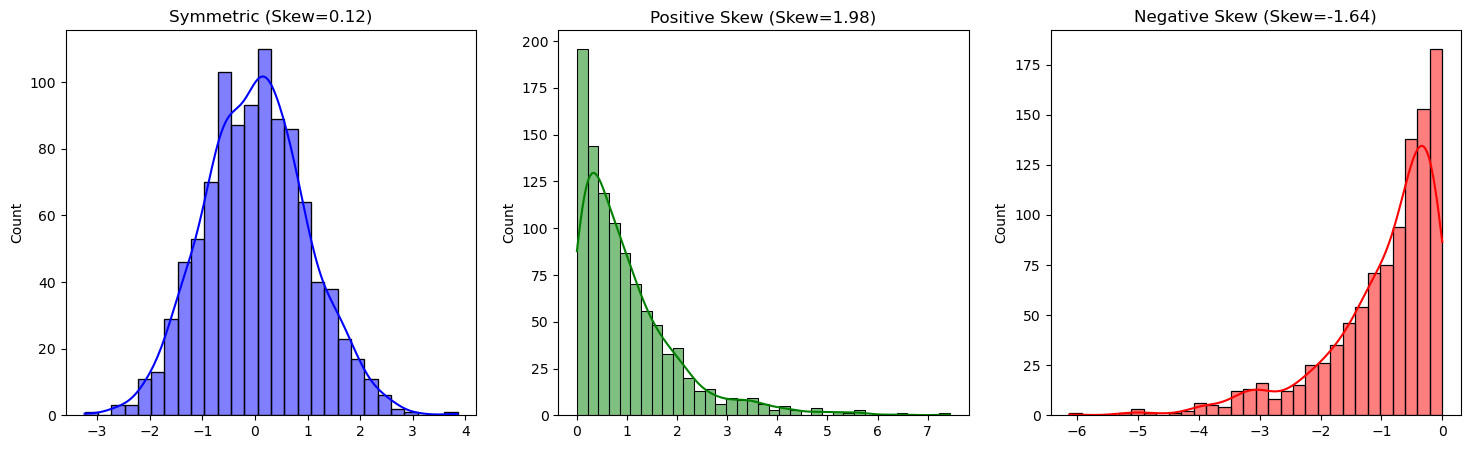

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

np.random.seed(42)

# Symmetric 
data_symmetric = np.random.normal(loc=0, scale=1, size=1000)

# Positive Skew 
data_pos_skew = np.random.exponential(scale=1, size=1000)

# Negative Skew 
data_neg_skew = -np.random.exponential(scale=1, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data_symmetric, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"Symmetric (Skew={skew(data_symmetric):.2f})")

sns.histplot(data_pos_skew, kde=True, ax=axes[1], color="green")
axes[1].set_title(f"Positive Skew (Skew={skew(data_pos_skew):.2f})")

sns.histplot(data_neg_skew, kde=True, ax=axes[2], color="red")
axes[2].set_title(f"Negative Skew (Skew={skew(data_neg_skew):.2f})")

plt.show()

### 5.2 Kurtosis
- Measures the peakedness (tailedness) of the distribution.

- Mesokurtic (Normal) → Standard normal distribution, moderate tails.

- Leptokurtic (High Kurtosis) → Sharper peak, heavy tails, more outliers. Example: financial data.

- Platykurtic (Low Kurtosis) → Flatter distribution, light tails, fewer outliers.

| Type          | Kurtosis       | Description             |
| ------------- | ----------------- | ------------------- |
| Leptokurtic| > 3 | Tall peak, heavy tails |
| Platykurtic | < 3  | Flat distribution   |
| Mesokurtic     | = 3         | Normal bell curve  |


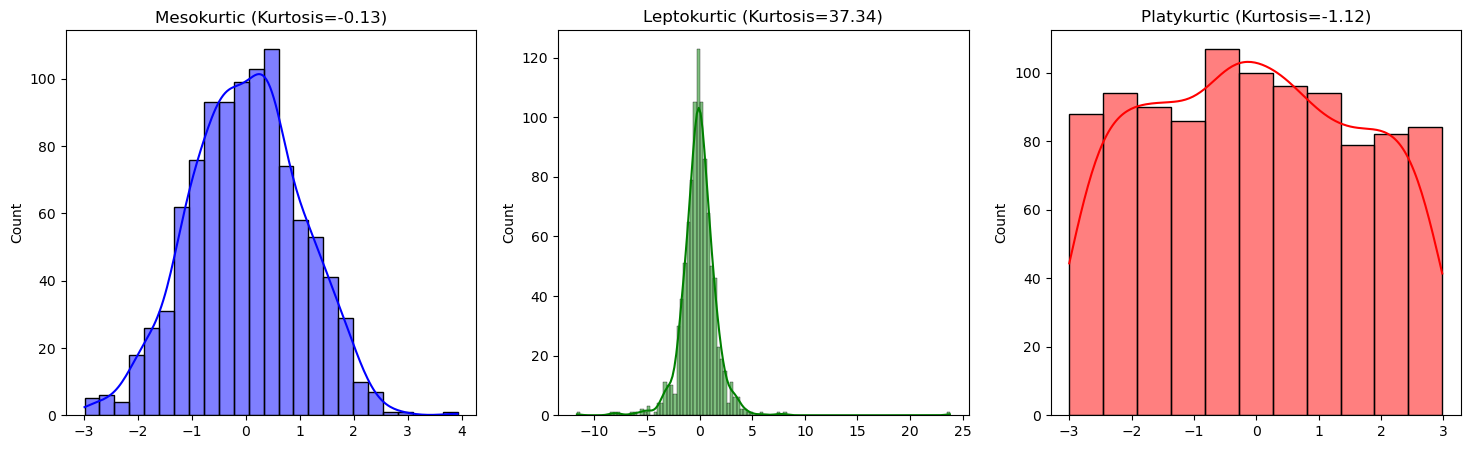

In [29]:
from scipy.stats import kurtosis


# Mesokurtic (Normal Distribution) -> Kurtosis ≈ 0
data_mesokurtic = np.random.normal(loc=0, scale=1, size=1000)

# Leptokurtic (t-distribution with low df -> heavy tails)
from scipy.stats import t
data_leptokurtic = t(df=3).rvs(1000)  # heavier tails

# Platykurtic (Uniform Distribution -> flat)
data_platykurtic = np.random.uniform(low=-3, high=3, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data_mesokurtic, kde=True, ax=axes[0], color="blue")
axes[0].set_title(f"Mesokurtic (Kurtosis={kurtosis(data_mesokurtic):.2f})")

sns.histplot(data_leptokurtic, kde=True, ax=axes[1], color="green")
axes[1].set_title(f"Leptokurtic (Kurtosis={kurtosis(data_leptokurtic):.2f})")

sns.histplot(data_platykurtic, kde=True, ax=axes[2], color="red")
axes[2].set_title(f"Platykurtic (Kurtosis={kurtosis(data_platykurtic):.2f})")

plt.show()

---

## 6. Measures of Spread (Variability)
These measure how spread out the data is around the center.

### 6.1 Range
- Difference between maximum and minimum values.
- Easy to calculate but highly sensitive to outliers.

Range = Max − Min

### 6.2 Variance - Average squared deviation from mean
- Tells how much the data values deviate from the mean on average.
- Squaring makes sure negative and positive differences don’t cancel out.
- Formula: average of squared differences from the mean.

σ² = ∑(xi −μ)²/N

### 6.3 Standard Deviation (SD) - Square root of variance; shows spread in same units as data

- Square root of variance.
- More interpretable than variance since it is in the same unit as the data.
- Low Std → data is closely clustered around the mean.
- High Std → data is widely spread.

σ = √Variance

### 6.4 Coefficient of Variation (CV) - SD relative to mean (useful for comparing datasets)
CV = σ/μ × 100

In [7]:
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))
print("Coefficient of Variation:", (np.std(data)/np.mean(data))*100, "%")

Variance: 888.8888888888888
Standard Deviation: 29.814239699997195
Coefficient of Variation: 81.31156281817418 %


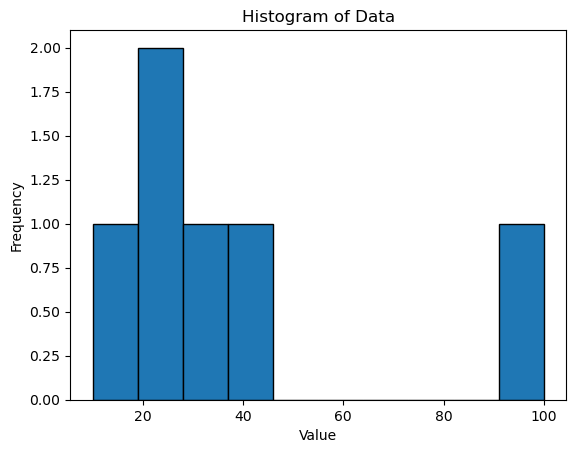

In [23]:
### Histogram (shows frequency distribution)

plt.hist(data, bins=10, edgecolor='black')
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

---
## 7. Covariance & Correlation

### 7.1 Covariance - Shows the direction of relationship between two variables.

- Positive → both variables move in the same direction.

- Negative → one increases while the other decreases.

- Limitation: value is not standardized (depends on the scale of variables).

### 7.2 Correlation - Standardized covariance → between -1 and +1.
- +1 → perfect positive relationship.

- -1 → perfect negative relationship.

- 0 → no linear relationship.

- Easier to interpret than covariance because it is unit-free.

- Commonly visualized with a correlation matrix heatmap.

Example: Height and weight usually show positive correlation.

In [10]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

print("Covariance Matrix:\n", np.cov(x, y))
print("Correlation:", np.corrcoef(x, y))

Covariance Matrix:
 [[ 2.5  5. ]
 [ 5.  10. ]]
Correlation: [[1. 1.]
 [1. 1.]]


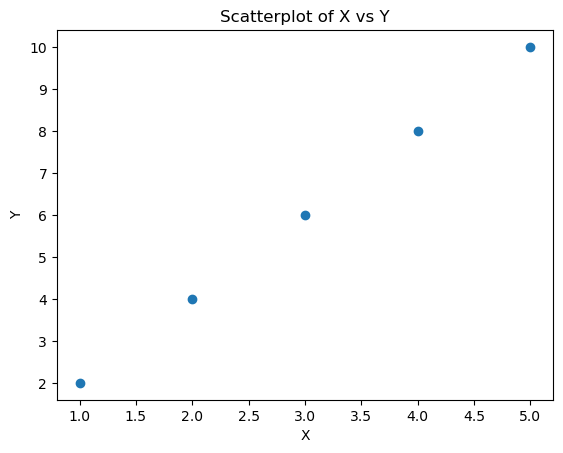

In [15]:
plt.scatter(x, y)
plt.title("Scatterplot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

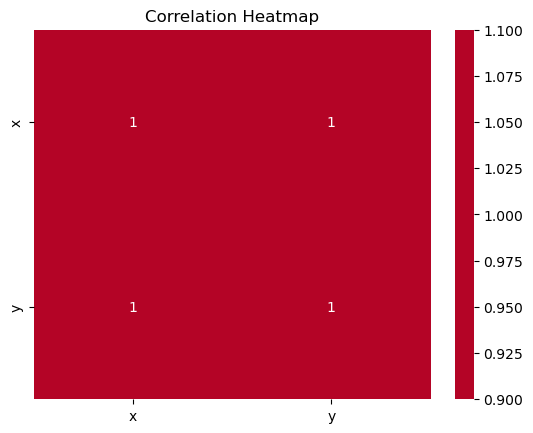

In [18]:
df_corr = pd.DataFrame({'x': x, 'y': y})
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

---
## 8. Summary Statistics with Pandas (.describe())

In [30]:
df = pd.DataFrame({'Marks': data})
print(df.describe())

            Marks
count    6.000000
mean    36.666667
std     32.659863
min     10.000000
25%     20.000000
50%     25.000000
75%     37.500000
max    100.000000


# Summary – Descriptive Statistics

In this notebook, I explored the fundamental concepts of **descriptive statistics**, which form the backbone of data analysis and machine learning.  

---
### Key Takeaways:
- **Measures of Central Tendency** (Mean, Median, Mode) help us understand the *center* of the data.
- **Measures of Spread** (Range, Variance, Standard Deviation) show how much the data is spread out or dispersed.
- **Shape of Distribution** is explained using **Skewness** (symmetry of data) and **Kurtosis** (peakedness and tails).
- **Covariance** indicates whether two variables move together, while **Correlation** quantifies both the *strength* and *direction* of their relationship.
- **Visualizations** such as histograms, boxplots, and heatmaps provide deeper insights into the data distribution and relationships.


### Final Note:
Descriptive statistics provide the **first layer of understanding** in any dataset.  
They summarize, visualize, and highlight the structure of data before applying advanced statistical models or machine learning algorithms.  
Mastering these concepts ensures a strong foundation for further topics like **inferential statistics, hypothesis testing, and predictive modeling**.
